# ePSproc wavefunction plotting tests & demo
20/07/20

This notebook demos wavefunction plotting from ePS gridded file outputs. The plotting is handled with [pyVista](https://docs.pyvista.org/), with [itkwidgets](https://github.com/InsightSoftwareConsortium/itkwidgets) for interactive plotting. Both tools are built on the [ITK/VTK toolchain](https://vtk.org/).

Aims:
- Implement wfPlot.py module.
- Test & demo.

See also:
- Early dev notebook, http://localhost:8888/notebooks/github/ePSproc/epsproc/tests/plottingDev/pyVista_tests_070320_basics_working_150320.ipynb
- Extended test notebook: http://localhost:8888/notebooks/github/ePSproc/epsproc/tests/plottingDev/ePSproc_wfPlot_tests_150720.ipynb
- Orbital plotting, https://epsproc.readthedocs.io/en/dev/methods/ePSproc_orbPlot_tests_130520.html


## Setup

In [1]:
# Standard libs
import sys
import os
from pathlib import Path
import numpy as np
import xarray as xr

from datetime import datetime as dt
timeString = dt.now()

# For reporting
import scooby
# scooby.Report(additional=['holoviews', 'hvplot', 'xarray', 'matplotlib', 'bokeh'])
# TODO: set up function for this, see https://github.com/banesullivan/scooby

In [2]:
# Installed package version
# import epsproc as ep  

# ePSproc test codebase (local)
if sys.platform == "win32":
    modPath = r'D:\code\github\ePSproc'  # Win test machine
else:
    modPath = r'/home/femtolab/github/ePSproc/'  # Linux test machine
    
sys.path.append(modPath)
import epsproc as ep

* plotly not found, plotly plots not available. 
* pyevtk not found, VTK export not available. 


## wfPlotter class

This provides a basic interface to pyVista plotting methods. An object is created with the wavefunction data (from file(s)) and set as a pyVista object, `.vol`, with a set of data arrays.

In [3]:
# Load class and data
from epsproc.vol.wfPlot import wfPlotter

# Load data from modPath\data
dataPath = os.path.join(modPath, 'data', 'wavefn')

wfClass = wfPlotter(fileBase = dataPath)


*** Scanning dir
/home/femtolab/github/ePSproc/data/wavefn
Found 1 _Orb.dat file(s)

Read 1 wavefunction data files OK.
*** Grids set OK
*** Data set OK
StructuredGrid (0x7f0d97d33f30)
  N Cells:	129600
  N Points:	137751
  X Bounds:	-1.000e+01, 1.000e+01
  Y Bounds:	-1.000e+01, 1.000e+01
  Z Bounds:	-1.000e+01, 1.000e+01
  Dimensions:	51, 37, 73
  N Arrays:	3



In [4]:
# Display pyVista object info
wfClass.vol

StructuredGrid (0x7f0d97d33f30)
  N Cells:	129600
  N Points:	137751
  X Bounds:	-1.000e+01, 1.000e+01
  Y Bounds:	-1.000e+01, 1.000e+01
  Z Bounds:	-1.000e+01, 1.000e+01
  Dimensions:	51, 37, 73
  N Arrays:	3

In [5]:
# Plot - default is an interactive version using ITK widgets.
wfClass.plotWf(pType='Re')
wfClass.pl.show()

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

**For HTML output** - the interactive widgets (using `pv.PlotterITK()` and ITK widgets) need a live notebook. For static output, pass `interactive=False` to the plotter.

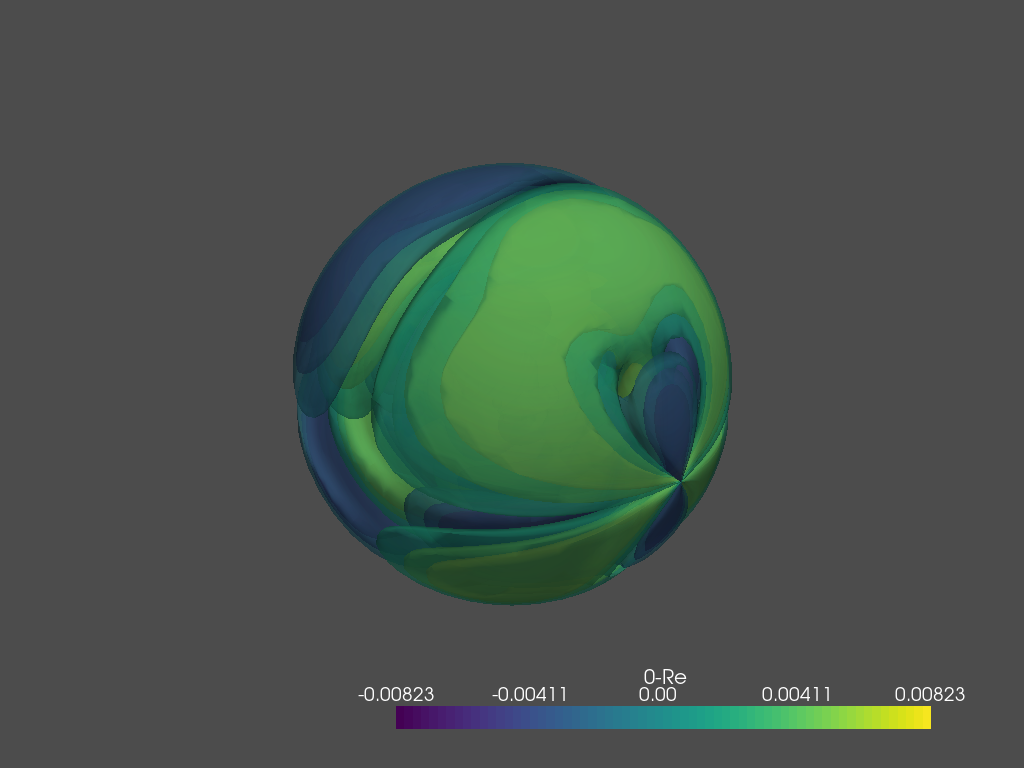

In [6]:
wfClass.plotWf(pType='Re', interactive=False)
# wfClass.pl.show()

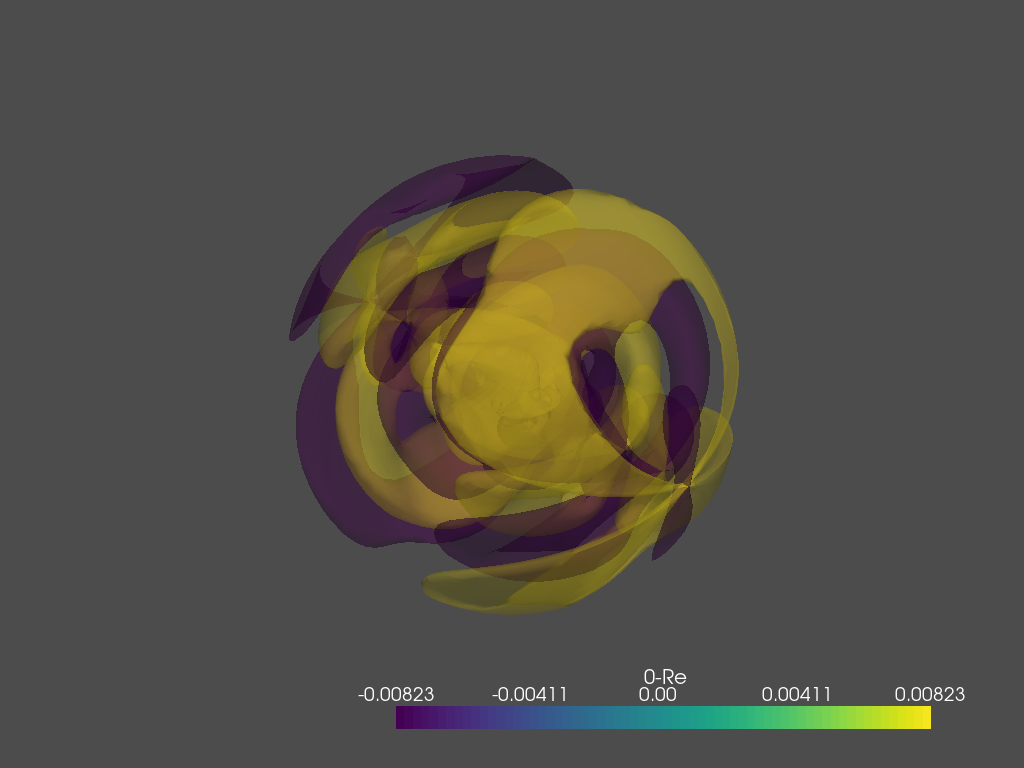

In [7]:
# For more control, pass # of iso surfs to plot (default=6), and opacity (default=0.5) (opacity mapping to do!)
wfClass.plotWf(pType='Re', interactive=False, isoLevels=2, opacity=0.3)
# wfClass.pl.show()

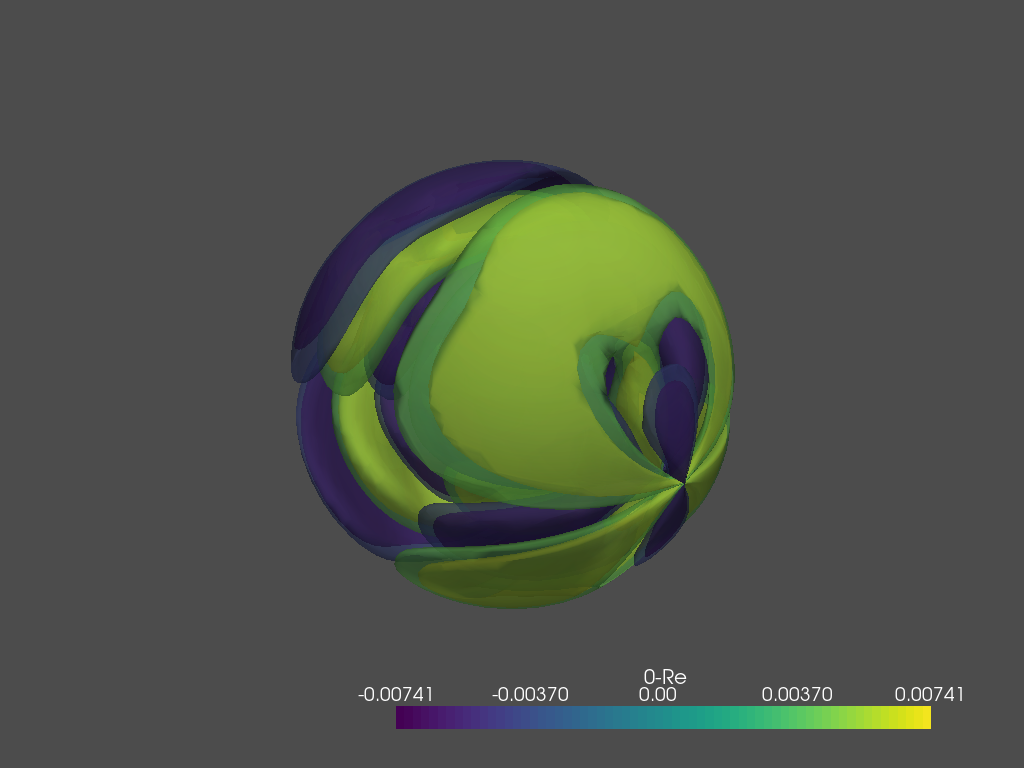

In [8]:
# Rather than just specifying a number, isovalues can be passed by %age or absolute value
# NOTE that these are set for +/- pairs, so each value produces two isosurfs (except when plotting the Abs values)

isoValsPC=[0.5,0.9]  # Set isosurfs at 50% and 90% of the max value.
wfClass.plotWf(pType='Re', interactive=False, isoValsPC=isoValsPC)
# wfClass.pl.show()

## Versions

In [9]:
import scooby
scooby.Report(additional=['epsproc', 'pyvista', 'xarray'])

--------------------------------------------------------------------------------
  Date: Tue Jul 21 13:43:58 2020 EDT

                OS : Linux
            CPU(s) : 4
           Machine : x86_64
      Architecture : 64bit
               RAM : 7.7 GB
       Environment : Jupyter

  Python 3.7.6 (default, Jan  8 2020, 19:59:22)  [GCC 7.3.0]

           epsproc : 1.2.5-dev
           pyvista : 0.23.1
            xarray : 0.13.0
             numpy : 1.18.1
             scipy : 1.3.1
           IPython : 7.13.0
        matplotlib : 3.2.0
            scooby : 0.5.5

  Intel(R) Math Kernel Library Version 2019.0.4 Product Build 20190411 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------